## Yubotu lakša verzija

![title](yubotu.png)

In [1]:
import z3
from z3 import Implies, Not, And, Bool, PbEq, sat

In [2]:
import matplotlib.pyplot as plt

def plot_model(m):
    mat = [[(i-j)%2 for i in range(10)] for j in range(10)]
    for i in range(10):
        for j in range(10):
            if m.evaluate(p[i][j]):
                mat[i][j] = 10 + (i-j) % 2
    plt.matshow(mat)

In [3]:
s = z3.Solver()
p = [[z3.Bool("p{},{}".format(j, i)) for i in range(10)] for j in range(10)]

rows = [1, 1, 2, 6, 1, 0, 3, 2, 3, 1]
col = [5, 0, 1, 0, 4, 1, 2, 1, 1, 5]

In [4]:
# Broj popunjenih polja u redovima.
for (i, r) in enumerate(rows):
    s.add(z3.PbEq([(p[i][j],1) for j in range(10)], r))   

# Broj popunjenih polja u kolonama.
for (j, c) in enumerate(col):
    s.add(z3.PbEq([(p[i][j],1) for i in range(10)], c))

In [5]:
# Dijagonalni uslov.
for i in range(10):
    for j in range(10):
        if (i < 9 and j < 9):
            s.add(Implies(p[i][j], Not(p[i+1][j+1])))
        if (i < 9 and j > 0):
            s.add(Implies(p[i][j], Not(p[i+1][j-1])))        
        if (i > 0 and j < 9):
            s.add(Implies(p[i][j], Not(p[i-1][j+1])))
        if (i > 0 and j > 0):
            s.add(Implies(p[i][j], Not(p[i-1][j-1])))

In [6]:
# Maksimalno 4 polja uslov - redovi.
for i in range(6):
    for j in range(10):
        s.add(Implies(And(p[i][j], p[i+1][j], p[i+2][j], p[i+3][j]), Not(p[i+4][j])))
        if i > 0:
            s.add(Implies(And(p[i][j], p[i+1][j], p[i+2][j], p[i+3][j]), Not(p[i-1][j])))

# Maksimalno 4 polja uslov - kolone.
for i in range(10):
    for j in range(6):
        s.add(Implies(And(p[i][j], p[i][j+1], p[i][j+2], p[i][j+3]), Not(p[i][j+4])))
        if j > 0:
            s.add(Implies(And(p[i][j], p[i][j+1], p[i][j+2], p[i][j+3]), Not(p[i][j-1])))

In [7]:
# Polja desno i levo prazna ako je polje ispred zauzeto - redovi.
for i in range(9):
    for j in range(10):
        if j > 0:
            s.add(Implies(And(p[i][j], p[i+1][j]), Not(p[i][j-1])))
        if j < 9:
            s.add(Implies(And(p[i][j], p[i+1][j]), Not(p[i][j+1])))

# # Polja desno i levo prazna ako je polje ispred zauzeto - redovi.
for i in range(10):
    for j in range(9):
        if i > 0:
            s.add(Implies(And(p[i][j], p[i][j+1]), Not(p[i-1][j])))
        if i < 9:
            s.add(Implies(And(p[i][j], p[i][j+1]), Not(p[i+1][j])))

In [8]:
# Pocetno stanje igre.
s.add(p[0][0])
s.add(p[1][8])
s.add(p[8][0])
s.add(p[9][0])

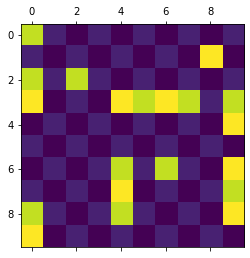

In [9]:
s.set(unsat_core=True)
if s.check() == sat:
    m = s.model()
    plot_model(m)
else:
    print(s.unsat_core())